# Préparation des données accidents de la route

## Objectifs :

- préparer les données pour faire de la prédiction,
- se concentrer sur une seule région

Source de la données : https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/#/resources

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn

In [21]:
acc = pandas.read_csv(".\\DONNEES\\carcteristiques-2021.csv", sep=";", decimal=",")
acc.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,44.038958,4.348022
1,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,49.242129,4.554546
2,202100000003,15,7,2021,07:55,1,85,85048,2,1,7,6,15 rue François Nicolas,46.921950,-0.964460
3,202100000004,27,3,2021,19:45,5,93,93005,2,2,3,6,Route de Mitry,48.949363,2.519664
4,202100000005,25,2,2021,07:20,5,76,76429,2,1,1,2,PARIS. ROUTE DE,49.408380,1.145810


In [22]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56518 entries, 0 to 56517
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Num_Acc  56518 non-null  int64  
 1   jour     56518 non-null  int64  
 2   mois     56518 non-null  int64  
 3   an       56518 non-null  int64  
 4   hrmn     56518 non-null  object 
 5   lum      56518 non-null  int64  
 6   dep      56518 non-null  object 
 7   com      56518 non-null  object 
 8   agg      56518 non-null  int64  
 9   int      56518 non-null  int64  
 10  atm      56518 non-null  int64  
 11  col      56518 non-null  int64  
 12  adr      55945 non-null  object 
 13  lat      56518 non-null  float64
 14  long     56518 non-null  float64
dtypes: float64(2), int64(9), object(4)
memory usage: 6.5+ MB


In [23]:
acc["nb_acc"] = 1

Ensuite, il faut cibler uniquement les accidents impliquants des voitures.

In [24]:
vehi = pandas.read_csv(".\\DONNEES\\vehicules-2021.csv", sep=";", decimal=",",
                      dtype={"catv":object})
vehi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97315 entries, 0 to 97314
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_Acc      97315 non-null  int64  
 1   id_vehicule  97315 non-null  object 
 2   num_veh      97315 non-null  object 
 3   senc         97315 non-null  int64  
 4   catv         97315 non-null  object 
 5   obs          97315 non-null  int64  
 6   obsm         97315 non-null  int64  
 7   choc         97315 non-null  int64  
 8   manv         97315 non-null  int64  
 9   motor        97315 non-null  int64  
 10  occutc       744 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 8.2+ MB


In [25]:
acc = pandas.merge(left=acc, right=vehi, 
                   left_on="Num_Acc", 
                   right_on="Num_Acc", how="left")
acc.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,...,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,30,11,2021,07:32,2,30,30319,1,1,...,201 765,A01,1,7,0,9,3,17,1,NaN
2,202100000002,25,9,2021,14:20,1,51,51544,1,3,...,201 762,A01,0,7,2,2,1,1,0,NaN
3,202100000002,25,9,2021,14:20,1,51,51544,1,3,...,201 763,B01,0,7,0,2,1,9,0,NaN
4,202100000003,15,7,2021,07:55,1,85,85048,2,1,...,201 761,A01,1,7,0,1,3,1,1,NaN


In [26]:
catv_interet = ["02", "03", "07", "10", "30", 
               "31", "32", "33", "34", "41", 
               "42", "43"]

In [27]:
acc = acc[ acc["catv"].isin(catv_interet) ]
acc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23066 entries, 13 to 97305
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_Acc      23066 non-null  int64  
 1   jour         23066 non-null  int64  
 2   mois         23066 non-null  int64  
 3   an           23066 non-null  int64  
 4   hrmn         23066 non-null  object 
 5   lum          23066 non-null  int64  
 6   dep          23066 non-null  object 
 7   com          23066 non-null  object 
 8   agg          23066 non-null  int64  
 9   int          23066 non-null  int64  
 10  atm          23066 non-null  int64  
 11  col          23066 non-null  int64  
 12  adr          22870 non-null  object 
 13  lat          23066 non-null  float64
 14  long         23066 non-null  float64
 15  nb_acc       23066 non-null  int64  
 16  id_vehicule  23066 non-null  object 
 17  num_veh      23066 non-null  object 
 18  senc         23066 non-null  int64  
 19  catv    

Maintenant, on va pouvoir limiter les accidents aux accidents qui nous intéressent le plus.

In [28]:
acc.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'nb_acc', 'id_vehicule',
       'num_veh', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor',
       'occutc'],
      dtype='object')

In [29]:
res = acc[ ['jour', 'mois', 'an', 'dep', 'nb_acc'] ]
res.head()

,jour,mois,an,dep,nb_acc
13,21,11,2021,987,1
22,20,10,2021,21,1
37,24,10,2021,91,1
38,25,9,2021,78,1
45,31,12,2021,07,1


In [30]:
def CreerDate(r) :
    date = f"{r['jour']}/{r['mois']}/{r['an']}"
    
    return date

res["date_cplt"] = res.apply(func=CreerDate, axis=1)
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23066 entries, 13 to 97305
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jour       23066 non-null  int64 
 1   mois       23066 non-null  int64 
 2   an         23066 non-null  int64 
 3   dep        23066 non-null  object
 4   nb_acc     23066 non-null  int64 
 5   date_cplt  23066 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


C:\Users\will\AppData\Local\Temp\ipykernel_8740\3735910981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["date_cplt"] = res.apply(func=CreerDate, axis=1)


In [31]:
res.columns
res = res[ ['date_cplt', 'dep', 'nb_acc'] ]
idf = ["75", "77", "78", "91", "92", "93", "94", "95"]
res = res[ res["dep"].isin(idf) ]
res_grp = res.groupby(by=["date_cplt"], as_index=False)["nb_acc"].sum()

res_grp.head()

,date_cplt,nb_acc
0,1/1/2021,6
1,1/10/2021,35
2,1/11/2021,15
3,1/12/2021,40
4,1/2/2021,18


In [32]:
## convertir date_cplt en date :
res_grp["date_cplt"] = pandas.to_datetime(res_grp["date_cplt"], format="%d/%m/%Y")
res_grp.index = res_grp["date_cplt"]
res_grp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-09-09
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_cplt  365 non-null    datetime64[ns]
 1   nb_acc     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


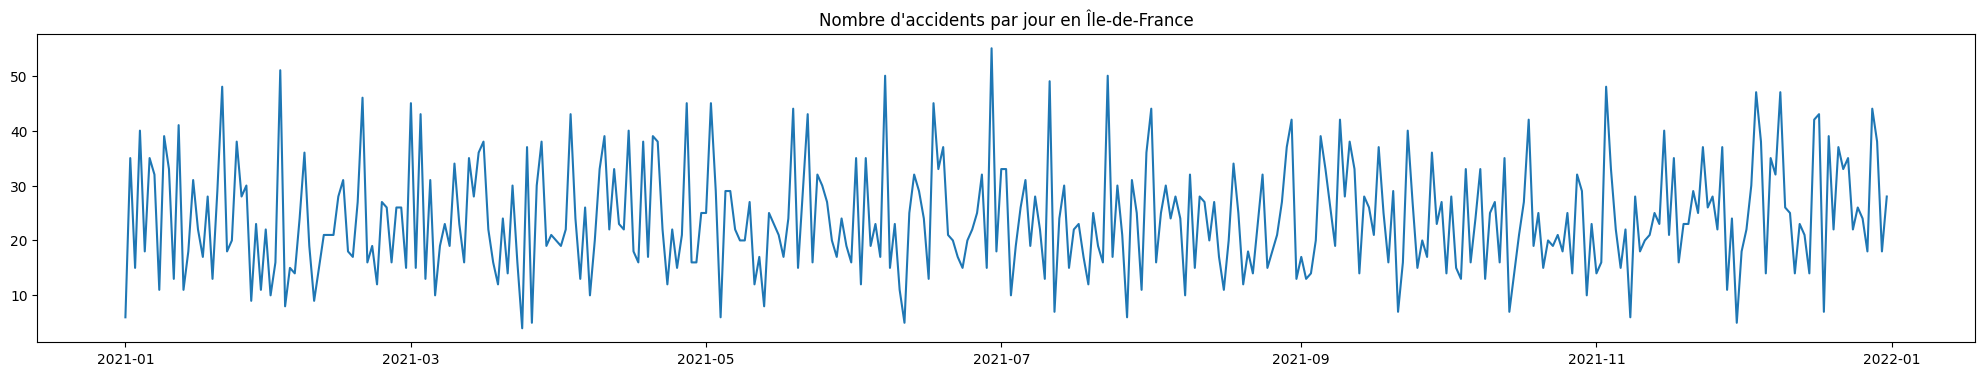

In [33]:
fig, ax = plt.subplots(figsize=(25,4))

ax.plot(res_grp["date_cplt"].sort_values(), res_grp["nb_acc"])
ax.set_title("Nombre d'accidents par jour en Île-de-France")

plt.show()

In [34]:
res_grp.to_csv(".\\TRAITEMENT\\accidents_par_jour_en_idf.csv", sep=";", decimal=".", encoding="utf-8")